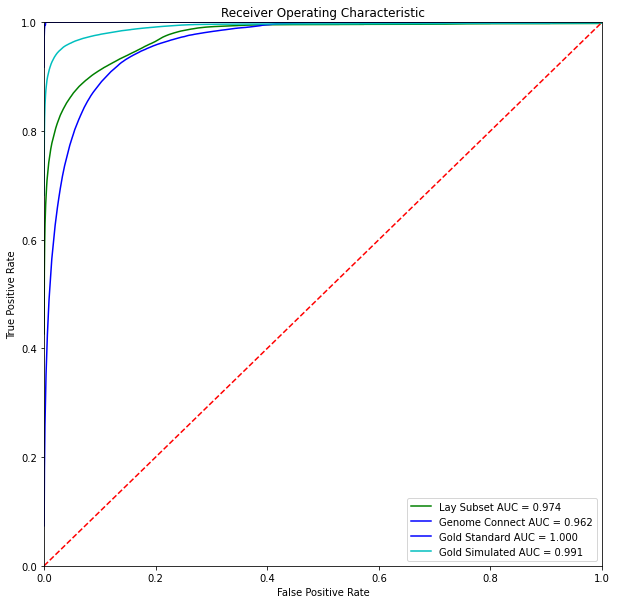

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from typing import Tuple, List


def get_tpr_fpr(file) -> Tuple[List[int], List[int]]:
    fpr = []
    tpr = []
    with open(file, 'r') as confusion_matrix:
        for line in confusion_matrix:
            rank, true_pos, false_pos, false_neg, true_neg = line.rstrip("\n").split("\t")

            fpr.append( int(false_pos) / (int(false_pos) + int(true_neg)) )
            tpr.append( int(true_pos) / (int(true_pos) + int(false_neg)) )
            
    return fpr, tpr

# Plot ROC curve when rank is used as a threshold (ties are averaged, see unit tests for examples)
    
lay_fpr, lay_tpr = get_tpr_fpr('../data/confusion_matrices/rank/lay-confusion.tsv')
gold_fpr, gold_tpr = get_tpr_fpr('../data/confusion_matrices/rank/gold-confusion.tsv')
gc_fpr, gc_tpr = get_tpr_fpr('../data/confusion_matrices/rank/gc-confusion.tsv')
sim_fpr, sim_tpr = get_tpr_fpr('../data/confusion_matrices/rank/simulated-confusion.tsv')

gc_auc = auc(gc_fpr, gc_tpr)
lay_auc = auc(lay_fpr, lay_tpr)
gold_auc = auc(gold_fpr, gold_tpr)
sim_auc = auc(sim_fpr, sim_tpr)


plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(lay_fpr, lay_tpr, 'g', label = 'Lay Subset AUC = %0.3f' % lay_auc)
plt.plot(gc_fpr, gc_tpr, 'b', label = 'Genome Connect AUC = %0.3f' % gc_auc)
plt.plot(gold_fpr, gold_tpr, 'b', label = 'Gold Standard AUC = %0.3f' % gold_auc)
plt.plot(sim_fpr, sim_tpr, 'c', label = 'Gold Simulated AUC = %0.3f' % sim_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

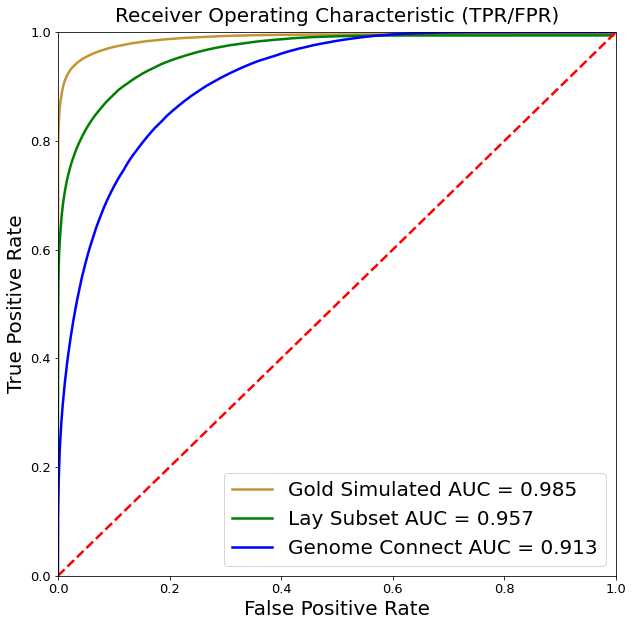

In [42]:
# Plot ROC curve when using probability of a threshold

sim_fpr, sim_tpr = get_tpr_fpr('../data/confusion_matrices/prob/simulated-confusion.tsv')
lay_fpr, lay_tpr = get_tpr_fpr('../data/confusion_matrices/prob/lay-confusion.tsv')
#gold_fpr, gold_tpr = get_tpr_fpr('../data/confusion_matrices/prob/gold-confusion.tsv')
gc_fpr, gc_tpr = get_tpr_fpr('../data/confusion_matrices/prob/gc-confusion.tsv')

sim_auc = auc(sim_fpr, sim_tpr)
gc_auc = auc(gc_fpr, gc_tpr)
lay_auc = auc(lay_fpr, lay_tpr)
#gold_auc = auc(gold_fpr, gold_tpr)

line_width = 2.5

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic (TPR/FPR)', fontsize=20, pad=10)
plt.plot(sim_fpr, sim_tpr, '#C59434', label = 'Gold Simulated AUC = %0.3f' % sim_auc, linewidth=line_width)
plt.plot(lay_fpr, lay_tpr, 'g', label = 'Lay Subset AUC = %0.3f' % lay_auc, linewidth=line_width)
plt.plot(gc_fpr, gc_tpr, 'b', label = 'Genome Connect AUC = %0.3f' % gc_auc, linewidth=line_width)
#plt.plot(gold_fpr, gold_tpr, 'b', label = 'Gold Standard AUC = %0.3f' % gold_auc, linewidth=7.0)

plt.legend(loc = 'lower right', prop={'size': 20})
plt.plot([0, 1], [0, 1],'r--', linewidth=line_width)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.savefig('./roc-curve.png', bbox_inches = 'tight', pad_inches = 0)
plt.show()